# Regresi Logistic Manual 

In [327]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from Fungsi import sigmoid

## Beni Data

In [328]:
x1 = np.array([18 + 0.5* np.random.randn() for i in range (100)])
x2 = np.array([5 + 0.5* np.random.randn() for i in range(100)])
y1 = np.array( [1 for i in range (100)])
y2 = np.array([0 for i in range (100)])
Label = np.array(['Beni' for i in range(100)])

In [329]:
d = {
    'x1' : x1,
    'x2' : x2,
    'y1' : y1,
    'y2' : y2,
    'Label' : Label
}

In [330]:
df = pd.DataFrame(data=d)

In [331]:
df

,x1,x2,y1,y2,Label
0,17.620994,4.576937,1,0,Beni
1,17.645853,4.963676,1,0,Beni
2,17.951196,5.379213,1,0,Beni
3,18.010410,4.747155,1,0,Beni
4,18.006557,5.309191,1,0,Beni
...,...,...,...,...,...
95,17.402620,5.205282,1,0,Beni
96,17.795778,3.903062,1,0,Beni
97,17.171420,5.459473,1,0,Beni
98,17.814822,5.708879,1,0,Beni


# Andy Data

In [332]:
x1 = np.array([16 + 0.5 * np.random.randn() for i in range (100)])
x2 = np.array([7 + 0.5 * np.random.randn() for i in range(100)])
y1 = np.array( [0 for i in range (100)])
y2 = np.array([1 for i in range (100)])
Label = np.array(['Andy' for i in range(100)])

Data_ucup = {
    'x1' : x1,
    'x2' : x2,
    'y1' : y1,
    'y2' : y2,
    'Label' : Label
}
df2 = pd.DataFrame(data=Data_ucup)


In [333]:
df2

,x1,x2,y1,y2,Label
0,16.023428,7.026521,0,1,Andy
1,15.503024,6.171983,0,1,Andy
2,16.889274,6.959846,0,1,Andy
3,15.419411,7.213859,0,1,Andy
4,16.757384,8.500717,0,1,Andy
...,...,...,...,...,...
95,15.692686,6.976344,0,1,Andy
96,16.259093,6.248717,0,1,Andy
97,16.385398,6.770434,0,1,Andy
98,16.753178,7.066312,0,1,Andy


In [334]:
df3 = pd.concat([df,df2])

In [335]:
df3

,x1,x2,y1,y2,Label
0,17.620994,4.576937,1,0,Beni
1,17.645853,4.963676,1,0,Beni
2,17.951196,5.379213,1,0,Beni
3,18.010410,4.747155,1,0,Beni
4,18.006557,5.309191,1,0,Beni
...,...,...,...,...,...
95,15.692686,6.976344,0,1,Andy
96,16.259093,6.248717,0,1,Andy
97,16.385398,6.770434,0,1,Andy
98,16.753178,7.066312,0,1,Andy


In [336]:
df3 = shuffle(df3)

In [337]:
df3

,x1,x2,y1,y2,Label
57,18.531069,5.268164,1,0,Beni
15,17.954465,5.012810,1,0,Beni
36,16.139638,7.310969,0,1,Andy
8,18.526771,4.602868,1,0,Beni
60,16.382622,6.302463,0,1,Andy
...,...,...,...,...,...
99,15.673835,7.163331,0,1,Andy
29,16.306601,5.947158,0,1,Andy
54,15.994995,6.588575,0,1,Andy
95,15.692686,6.976344,0,1,Andy


In [338]:
df3.reset_index(inplace=True,drop=True)

In [339]:
df3

,x1,x2,y1,y2,Label
0,18.531069,5.268164,1,0,Beni
1,17.954465,5.012810,1,0,Beni
2,16.139638,7.310969,0,1,Andy
3,18.526771,4.602868,1,0,Beni
4,16.382622,6.302463,0,1,Andy
...,...,...,...,...,...
195,15.673835,7.163331,0,1,Andy
196,16.306601,5.947158,0,1,Andy
197,15.994995,6.588575,0,1,Andy
198,15.692686,6.976344,0,1,Andy


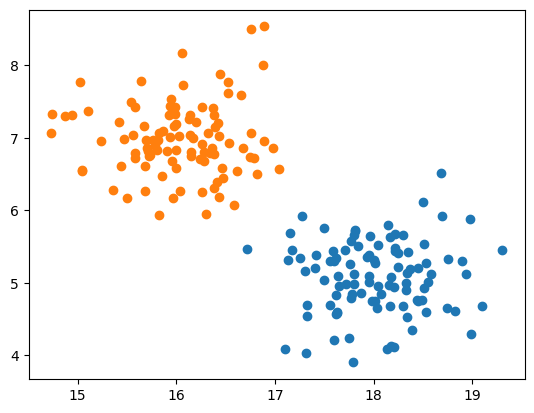

In [340]:
plt.scatter(df.x1,df.x2)
plt.scatter(df2.x1,df2.x2)
plt.show()

# Neural Network

In [341]:
w11 = np.random.uniform(-0.01,0.01)
w12 = np.random.uniform(-0.01,0.01)
w21 = np.random.uniform(-0.01,0.01)
w22 = np.random.uniform(-0.01,0.01)

W = np.array(([w11,w12],
              [w21,w22]))

In [342]:
W

array([[-0.00906585,  0.00254676],
       [ 0.00731298,  0.00323429]])

## 2. Iterasi Neural Network

In [343]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2,len(df3)))
for index,baris in df3.iterrows() :
    Input = np.array([[baris.x1],[baris.x2]])
    Output = np.dot(W,Input)
    output_learn = sigmoid(Output)
    output_aktual = np.array([[baris.y1],[baris.y2]])
    error = output_aktual - output_learn
    delta_w = np.dot(learning_rate * error * output_learn * ( 1 - output_learn),Input.T)
    W = W + delta_w
    tebakan = np.argmax(output_learn)
    jawaban = np.argmax(output_aktual)
    label_tebakan = "Beni" if tebakan == 0 else "Andy"
    print(f"index = {index}, Guest = {label_tebakan}, Answer = {baris.Label}")
    if tebakan == jawaban :
        answer.append(1)
    else :
        answer.append(0)
answer = np.array(answer)
error_array = error_array.T + answer[:,np.newaxis]



index = 0, Guest = Andy, Answer = Beni
index = 1, Guest = Beni, Answer = Beni
index = 2, Guest = Beni, Answer = Andy
index = 3, Guest = Beni, Answer = Beni
index = 4, Guest = Beni, Answer = Andy
index = 5, Guest = Beni, Answer = Beni
index = 6, Guest = Beni, Answer = Beni
index = 7, Guest = Beni, Answer = Beni
index = 8, Guest = Beni, Answer = Andy
index = 9, Guest = Beni, Answer = Beni
index = 10, Guest = Beni, Answer = Beni
index = 11, Guest = Beni, Answer = Andy
index = 12, Guest = Beni, Answer = Andy
index = 13, Guest = Andy, Answer = Andy
index = 14, Guest = Andy, Answer = Beni
index = 15, Guest = Andy, Answer = Beni
index = 16, Guest = Beni, Answer = Andy
index = 17, Guest = Beni, Answer = Andy
index = 18, Guest = Andy, Answer = Beni
index = 19, Guest = Beni, Answer = Beni
index = 20, Guest = Beni, Answer = Andy
index = 21, Guest = Andy, Answer = Beni
index = 22, Guest = Beni, Answer = Beni
index = 23, Guest = Beni, Answer = Andy
index = 24, Guest = Andy, Answer = Andy
index = 25

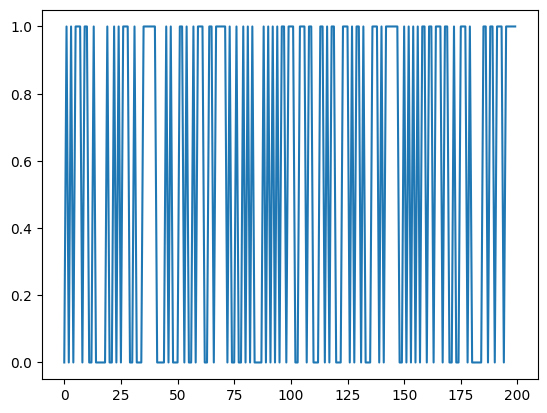

In [344]:
plt.plot(answer)

In [345]:
x1 = 18
x2 = 4

Input = np.array([[x1],[x2]])
output_hidden = np.dot(W,Input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)
label_prediction = "Andy" if prediction == 1 else "Beni"
print(f"height = {x1 * 10},with weight = {x2 * 10}, is {label_prediction}")

height = 180,with weight = 40, is Beni
